In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [2]:
# Upload the train.csv file
from google.colab import files
print("Please upload your train.csv file:")
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('train.csv')
print(f"\n✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Please upload your train.csv file:


Saving train.csv to train.csv

✅ Dataset loaded successfully!
Shape: (1460, 81)

First 5 rows:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Select the 6 required features + target variable
selected_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'YearBuilt', 'Neighborhood', 'SalePrice']

df_selected = df[selected_features].copy()

print("✅ Features selected!")
print(f"\nDataset shape: {df_selected.shape}")
print(f"\nData types:\n{df_selected.dtypes}")
print(f"\nFirst few rows:")
df_selected.head()

✅ Features selected!

Dataset shape: (1460, 7)

Data types:
OverallQual      int64
GrLivArea        int64
TotalBsmtSF      int64
GarageCars       int64
YearBuilt        int64
Neighborhood    object
SalePrice        int64
dtype: object

First few rows:


,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,YearBuilt,Neighborhood,SalePrice
0,7,1710,856,2,2003,CollgCr,208500
1,6,1262,1262,2,1976,Veenker,181500
2,7,1786,920,2,2001,CollgCr,223500
3,7,1717,756,3,1915,Crawfor,140000
4,8,2198,1145,3,2000,NoRidge,250000


In [4]:
# Check for missing values
print("Missing Values in Each Column:")
print(df_selected.isnull().sum())

print("\n" + "="*50)
print("Statistical Summary:")
print("="*50)
df_selected.describe()

Missing Values in Each Column:
OverallQual     0
GrLivArea       0
TotalBsmtSF     0
GarageCars      0
YearBuilt       0
Neighborhood    0
SalePrice       0
dtype: int64

Statistical Summary:


,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1057.429452,1.767123,1971.267808,180921.195890
std,1.382997,525.480383,438.705324,0.747315,30.202904,79442.502883
min,1.000000,334.000000,0.000000,0.000000,1872.000000,34900.000000
25%,5.000000,1129.500000,795.750000,1.000000,1954.000000,129975.000000
50%,6.000000,1464.000000,991.500000,2.000000,1973.000000,163000.000000
75%,7.000000,1776.750000,1298.250000,2.000000,2000.000000,214000.000000
max,10.000000,5642.000000,6110.000000,4.000000,2010.000000,755000.000000


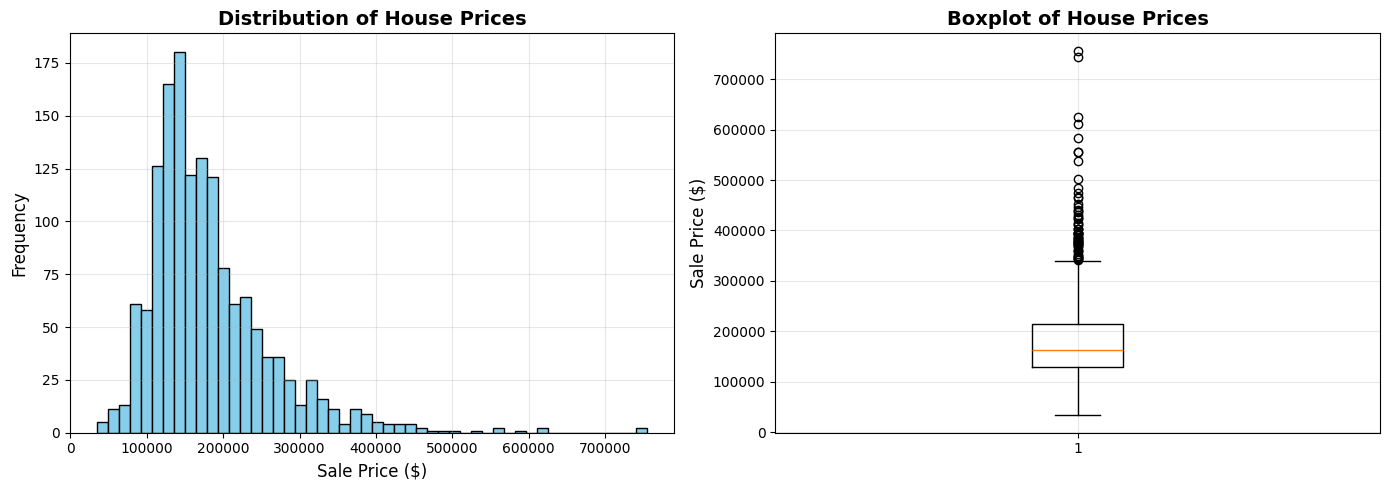


Price Statistics:
Mean: $180,921.20
Median: $163,000.00
Min: $34,900.00
Max: $755,000.00


In [5]:
# Visualize SalePrice distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_selected['SalePrice'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Sale Price ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of House Prices', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(df_selected['SalePrice'], vert=True)
axes[1].set_ylabel('Sale Price ($)', fontsize=12)
axes[1].set_title('Boxplot of House Prices', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPrice Statistics:")
print(f"Mean: ${df_selected['SalePrice'].mean():,.2f}")
print(f"Median: ${df_selected['SalePrice'].median():,.2f}")
print(f"Min: ${df_selected['SalePrice'].min():,.2f}")
print(f"Max: ${df_selected['SalePrice'].max():,.2f}")

In [6]:
# Fill numerical missing values with median
print("Handling missing values...")

df_selected['TotalBsmtSF'].fillna(df_selected['TotalBsmtSF'].median(), inplace=True)
df_selected['GarageCars'].fillna(df_selected['GarageCars'].median(), inplace=True)

# Remove rows with missing target variable
df_selected.dropna(subset=['SalePrice'], inplace=True)

print("\n✅ Missing values handled!")
print(f"\nMissing values after cleaning:")
print(df_selected.isnull().sum())
print(f"\nFinal dataset shape: {df_selected.shape}")

Handling missing values...

✅ Missing values handled!

Missing values after cleaning:
OverallQual     0
GrLivArea       0
TotalBsmtSF     0
GarageCars      0
YearBuilt       0
Neighborhood    0
SalePrice       0
dtype: int64

Final dataset shape: (1460, 7)


In [7]:
# Encode Neighborhood (categorical variable)
label_encoder = LabelEncoder()
df_selected['Neighborhood_Encoded'] = label_encoder.fit_transform(df_selected['Neighborhood'])

print("✅ Neighborhood encoded!")
print(f"\nNumber of unique neighborhoods: {len(label_encoder.classes_)}")
print(f"\nNeighborhoods: {list(label_encoder.classes_)}")
print(f"\nEncoding examples:")
print(df_selected[['Neighborhood', 'Neighborhood_Encoded']].drop_duplicates().head(10))

✅ Neighborhood encoded!

Number of unique neighborhoods: 25

Neighborhoods: ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']

Encoding examples:
   Neighborhood  Neighborhood_Encoded
0       CollgCr                     5
1       Veenker                    24
3       Crawfor                     6
4       NoRidge                    15
5       Mitchel                    11
6       Somerst                    21
7        NWAmes                    14
8       OldTown                    17
9       BrkSide                     3
10       Sawyer                    19


In [8]:
# Separate features (X) and target variable (y)
X = df_selected[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'YearBuilt', 'Neighborhood_Encoded']]
y = df_selected['SalePrice']

print("✅ Features and target separated!")
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures preview:")
X.head()

✅ Features and target separated!

Features shape: (1460, 6)
Target shape: (1460,)

Features preview:


,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,YearBuilt,Neighborhood_Encoded
0,7,1710,856,2,2003,5
1,6,1262,1262,2,1976,24
2,7,1786,920,2,2001,5
3,7,1717,756,3,1915,6
4,8,2198,1145,3,2000,15


In [9]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features scaled successfully!")
print(f"\nScaled features shape: {X_scaled.shape}")
print(f"\nOriginal vs Scaled (first 3 samples):")
print("\nOriginal:")
print(X.head(3))
print("\nScaled:")
print(pd.DataFrame(X_scaled[:3], columns=X.columns))

✅ Features scaled successfully!

Scaled features shape: (1460, 6)

Original vs Scaled (first 3 samples):

Original:
   OverallQual  GrLivArea  TotalBsmtSF  GarageCars  YearBuilt  \
0            7       1710          856           2       2003   
1            6       1262         1262           2       1976   
2            7       1786          920           2       2001   

   Neighborhood_Encoded  
0                     5  
1                    24  
2                     5  

Scaled:
   OverallQual  GrLivArea  TotalBsmtSF  GarageCars  YearBuilt  \
0     0.651479   0.370333    -0.459303    0.311725   1.050994   
1    -0.071836  -0.482512     0.466465    0.311725   0.156734   
2     0.651479   0.515013    -0.313369    0.311725   0.984752   

   Neighborhood_Encoded  
0             -1.206215  
1              1.954302  
2             -1.206215  


In [10]:
# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("✅ Data split completed!")
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining percentage: {(len(X_train)/len(X_scaled))*100:.1f}%")
print(f"Testing percentage: {(len(X_test)/len(X_scaled))*100:.1f}%")

✅ Data split completed!

Training set size: 1168 samples
Testing set size: 292 samples

Training percentage: 80.0%
Testing percentage: 20.0%


In [11]:
# Initialize and train Random Forest Regressor
print("Training Random Forest Regressor...")
print("This may take a minute...\n")

model = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=20,          # Maximum depth of trees
    min_samples_split=5,   # Minimum samples to split a node
    min_samples_leaf=2,    # Minimum samples in leaf node
    random_state=42,       # For reproducibility
    n_jobs=-1              # Use all CPU cores
)

model.fit(X_train, y_train)

print("✅ Model trained successfully!")
print(f"\nModel parameters: {model.get_params()}")

Training Random Forest Regressor...
This may take a minute...

✅ Model trained successfully!

Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [12]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print("="*60)
print("MODEL EVALUATION RESULTS")
print("="*60)

print("\n📊 TRAINING SET PERFORMANCE:")
print(f"  MAE  (Mean Absolute Error)      : ${train_mae:,.2f}")
print(f"  MSE  (Mean Squared Error)       : ${train_mse:,.2f}")
print(f"  RMSE (Root Mean Squared Error)  : ${train_rmse:,.2f}")
print(f"  R²   (Coefficient of Determination): {train_r2:.4f}")

print("\n📊 TESTING SET PERFORMANCE:")
print(f"  MAE  (Mean Absolute Error)      : ${test_mae:,.2f}")
print(f"  MSE  (Mean Squared Error)       : ${test_mse:,.2f}")
print(f"  RMSE (Root Mean Squared Error)  : ${test_rmse:,.2f}")
print(f"  R²   (Coefficient of Determination): {test_r2:.4f}")

print("\n" + "="*60)

# Interpretation
print("\n💡 INTERPRETATION:")
print(f"  - The model explains {test_r2*100:.2f}% of the variance in house prices")
print(f"  - On average, predictions are off by ${test_mae:,.2f}")
print(f"  - RMSE of ${test_rmse:,.2f} indicates typical prediction error")

MODEL EVALUATION RESULTS

📊 TRAINING SET PERFORMANCE:
  MAE  (Mean Absolute Error)      : $10,410.23
  MSE  (Mean Squared Error)       : $289,485,272.84
  RMSE (Root Mean Squared Error)  : $17,014.27
  R²   (Coefficient of Determination): 0.9515

📊 TESTING SET PERFORMANCE:
  MAE  (Mean Absolute Error)      : $18,688.95
  MSE  (Mean Squared Error)       : $873,728,030.97
  RMSE (Root Mean Squared Error)  : $29,558.89
  R²   (Coefficient of Determination): 0.8861


💡 INTERPRETATION:
  - The model explains 88.61% of the variance in house prices
  - On average, predictions are off by $18,688.95
  - RMSE of $29,558.89 indicates typical prediction error


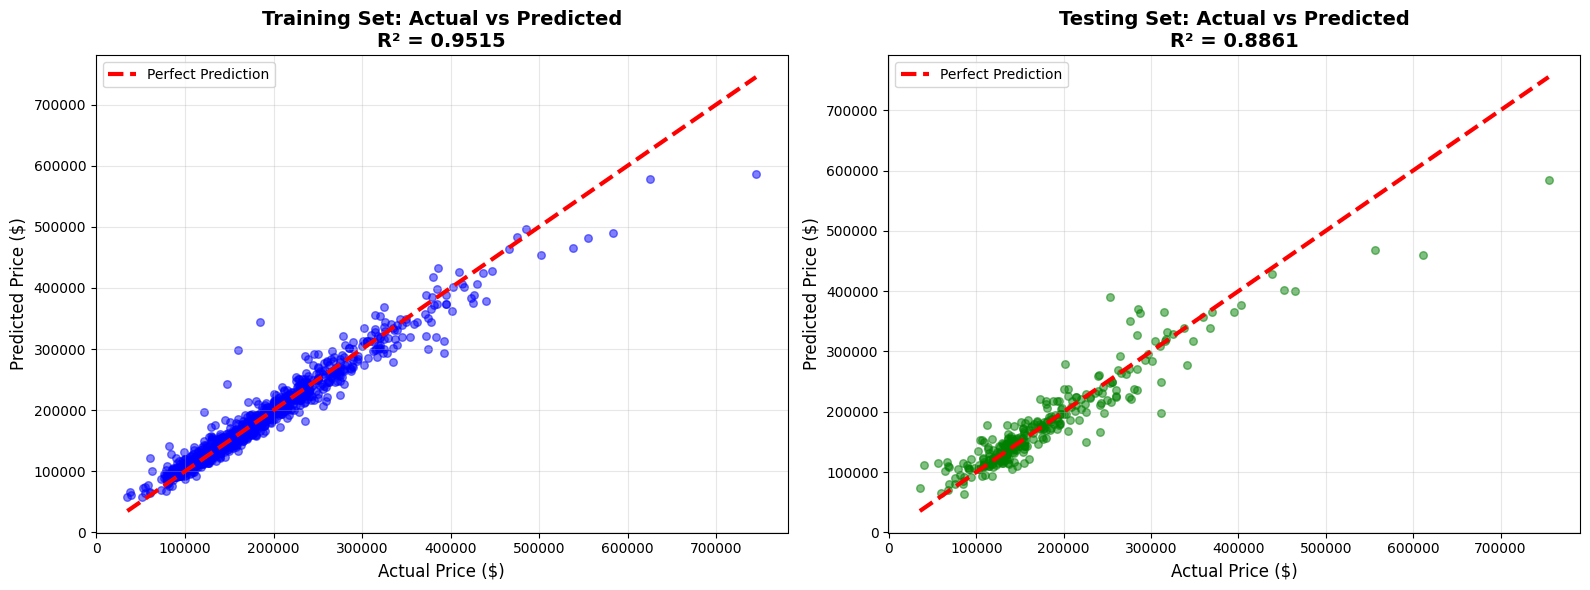

In [13]:
# Visualize actual vs predicted prices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=30, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
             'r--', lw=3, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($)', fontsize=12)
axes[0].set_ylabel('Predicted Price ($)', fontsize=12)
axes[0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}',
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Testing set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=30, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=3, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price ($)', fontsize=12)
axes[1].set_ylabel('Predicted Price ($)', fontsize=12)
axes[1].set_title(f'Testing Set: Actual vs Predicted\nR² = {test_r2:.4f}',
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

✅ Feature Importance Analysis:

     Feature  Importance
 OverallQual    0.602041
   GrLivArea    0.191363
 TotalBsmtSF    0.096769
   YearBuilt    0.051862
Neighborhood    0.029750
  GarageCars    0.028216


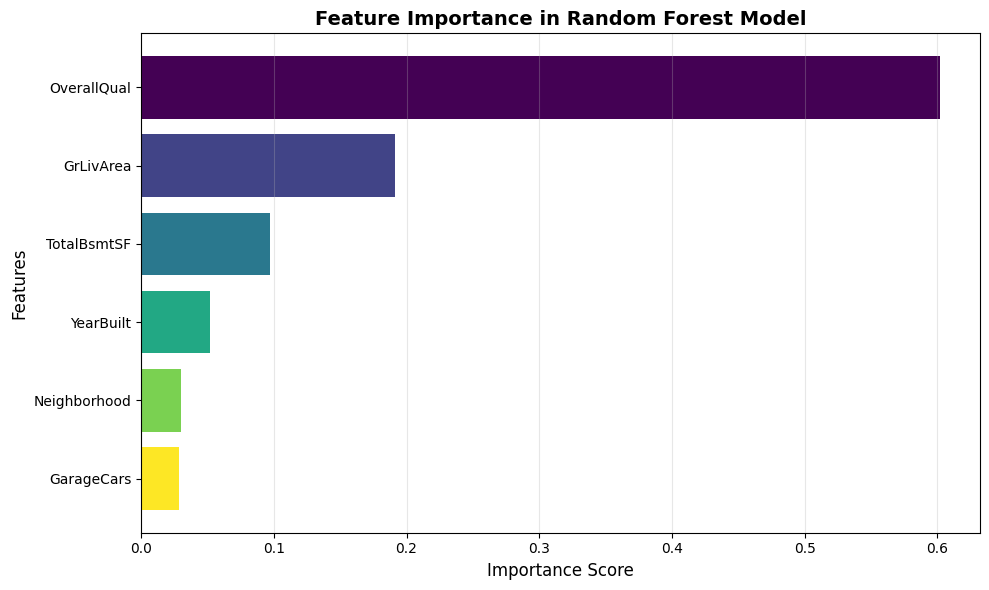


💡 Most Important Features:
  OverallQual: 0.6020
  GrLivArea: 0.1914
  TotalBsmtSF: 0.0968


In [14]:
# Analyze feature importance
feature_names = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'YearBuilt', 'Neighborhood']
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("✅ Feature Importance Analysis:")
print("\n" + importance_df.to_string(index=False))

# Plot feature importance
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(importance_df)))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in Random Forest Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Print interpretation
print("\n💡 Most Important Features:")
for idx, row in importance_df.head(3).iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f}")

In [15]:
# Save all necessary objects
print("Saving model and preprocessing objects...")

# Save the trained model
joblib.dump(model, 'house_price_model.pkl')
print("✅ Model saved as 'house_price_model.pkl'")

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler saved as 'scaler.pkl'")

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')
print("✅ Label encoder saved as 'label_encoder.pkl'")

print("\n" + "="*60)
print("All files saved successfully!")
print("="*60)

Saving model and preprocessing objects...
✅ Model saved as 'house_price_model.pkl'
✅ Scaler saved as 'scaler.pkl'
✅ Label encoder saved as 'label_encoder.pkl'

All files saved successfully!


In [16]:
# Load and test the saved model
print("Testing the saved model...\n")

loaded_model = joblib.load('house_price_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_encoder = joblib.load('label_encoder.pkl')

print("✅ Model loaded successfully!\n")

# Test with a sample prediction
sample_data = {
    'OverallQual': 7,
    'GrLivArea': 1500,
    'TotalBsmtSF': 1000,
    'GarageCars': 2,
    'YearBuilt': 2000,
    'Neighborhood': 'NAmes'
}

print("🏠 Sample House Details:")
for key, value in sample_data.items():
    print(f"  {key}: {value}")

# Prepare the input
sample_input = pd.DataFrame([sample_data])
sample_input['Neighborhood_Encoded'] = loaded_encoder.transform([sample_data['Neighborhood']])

# Prepare features
sample_features = sample_input[['OverallQual', 'GrLivArea', 'TotalBsmtSF',
                                  'GarageCars', 'YearBuilt', 'Neighborhood_Encoded']]

# Scale
sample_scaled = loaded_scaler.transform(sample_features)

# Predict
prediction = loaded_model.predict(sample_scaled)[0]

print("\n" + "="*60)
print(f"💰 PREDICTED HOUSE PRICE: ${prediction:,.2f}")
print("="*60)

Testing the saved model...

✅ Model loaded successfully!

🏠 Sample House Details:
  OverallQual: 7
  GrLivArea: 1500
  TotalBsmtSF: 1000
  GarageCars: 2
  YearBuilt: 2000
  Neighborhood: NAmes

💰 PREDICTED HOUSE PRICE: $181,111.33


In [17]:
# Download the saved files to your computer
from google.colab import files

print("Downloading files...")
print("These will be saved to your Downloads folder\n")

files.download('house_price_model.pkl')
print("✅ house_price_model.pkl downloaded")

files.download('scaler.pkl')
print("✅ scaler.pkl downloaded")

files.download('label_encoder.pkl')
print("✅ label_encoder.pkl downloaded")

print("\n" + "="*60)
print("NEXT STEPS:")
print("="*60)
print("1. Move these 3 files to your project's 'model/' folder")
print("2. Run your Flask app locally: python app.py")
print("3. Deploy to Render/PythonAnywhere")
print("4. Update the HousePrice_hosted_webGUI_link.txt file")
print("5. Push everything to GitHub")
print("="*60)

These will be saved to your Downloads folder



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ house_price_model.pkl downloaded


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ scaler.pkl downloaded


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ label_encoder.pkl downloaded

NEXT STEPS:
1. Move these 3 files to your project's 'model/' folder
2. Run your Flask app locally: python app.py
3. Deploy to Render/PythonAnywhere
4. Update the HousePrice_hosted_webGUI_link.txt file
5. Push everything to GitHub
